In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.shape

(962, 2)

In [6]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

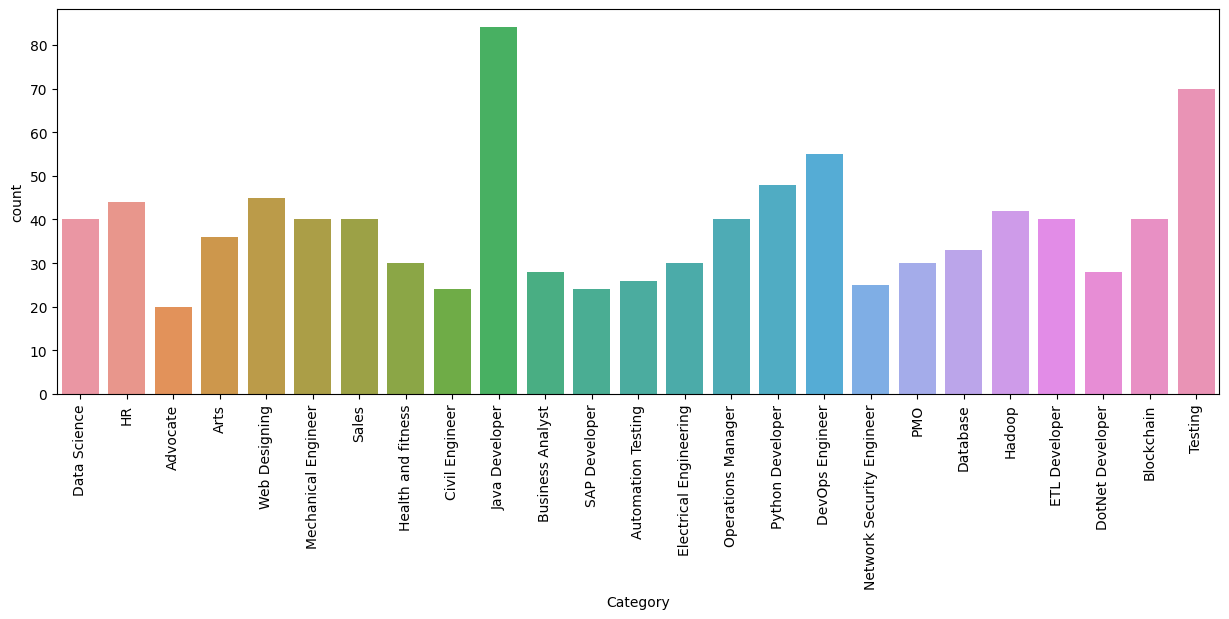

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(x='Category', data=df)
plt.xticks(rotation=90)
plt.show()

In [10]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [12]:
print('Original Category Distribution')
print(df['Category'].value_counts())

max_size = df['Category'].value_counts().max()

balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

df = balanced_df.sample(frac=1).reset_index(drop=True)

print('\nBalanced Category Distribution after Oversampling')
print(df['Category'].value_counts())

Original Category Distribution
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

Balanced Category Distribution after Oversampling
Category
Mechanical Engineer          84
ETL Developer                84
Automation

# Cleaning Data

In [16]:
import re
import string
def CleanResume(txt):
    txt = re.sub(r'http\S+', ' ', txt)
    
    # Remove mentions (e.g., @username)
    txt = re.sub(r'@\S+', ' ', txt)
    
    # Remove hashtags (keeping words)
    txt = re.sub(r'#\S+', ' ', txt)
    
    # Remove RT (retweets) and common Twitter elements
    txt = re.sub(r'\bRT\b|cc', ' ', txt)
    
    # Remove special characters, punctuations
    txt = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', txt)
    
    # Remove numbers
    txt = re.sub(r'\d+', ' ', txt)
    
    # Remove extra whitespace
    txt = re.sub(r'\s+', ' ', txt).strip()
    
    # Convert to lowercase
    txt = txt.lower()
    
    return txt
    

In [17]:
CleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it'

In [18]:
df['Resume'] = df['Resume'].apply(lambda x: CleanResume(x))

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
text = tfidf.transform(df['Resume'])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text, df['Category'], test_size=0.2, random_state=42)

In [25]:
X_train.shape, X_test.shape

((1680, 7001), (420, 7001))

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train = X_train.toarray()
X_test = X_test.toarray()


In [31]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print('\nKNeighborsClassifierResults:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}')
report_dict = classification_report(y_test, y_pred_knn, output_dict=True)

# Convert to DataFrame for better formatting
report_df = pd.DataFrame(report_dict).transpose()

# Round values to 4 decimal places
report_df = report_df.round(4)

print("\nClassification Report:")
print(report_df)



KNeighborsClassifierResults:
Accuracy: 0.9881

Classification Report:
              precision  recall  f1-score   support
0                1.0000  0.7895    0.8824   19.0000
1                1.0000  1.0000    1.0000   18.0000
2                0.9375  1.0000    0.9677   15.0000
3                1.0000  1.0000    1.0000   20.0000
4                1.0000  1.0000    1.0000   19.0000
5                1.0000  1.0000    1.0000   12.0000
6                1.0000  1.0000    1.0000   18.0000
7                1.0000  1.0000    1.0000   18.0000
8                1.0000  0.9091    0.9524   11.0000
9                1.0000  1.0000    1.0000   17.0000
10               1.0000  1.0000    1.0000   13.0000
11               1.0000  1.0000    1.0000   16.0000
12               0.7895  1.0000    0.8824   15.0000
13               1.0000  1.0000    1.0000   17.0000
14               1.0000  1.0000    1.0000   20.0000
15               1.0000  1.0000    1.0000   21.0000
16               1.0000  1.0000    1.0000   1

In [35]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")
report_dict = classification_report(y_test, y_pred_svc, output_dict=True)

# Convert to DataFrame for better formatting
report_df = pd.DataFrame(report_dict).transpose()

# Round values to 4 decimal places
report_df = report_df.round(4)

print("\nClassification Report:")
print(report_df)


SVC Results:
Accuracy: 1.0000
Confusion Matrix:
[[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0 

# Save

In [36]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open('encoder.pkl', 'wb'))

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
